In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [3]:
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

In [5]:
ticker = '^NSEI'
df = yf.download(ticker, start='2024-01-01', end='2025-01-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [7]:
data = df['Close'].values
data = data.reshape(-1, 1)
data

array([[21741.90039062],
       [21665.80078125],
       [21517.34960938],
       [21658.59960938],
       [21710.80078125],
       [21513.        ],
       [21544.84960938],
       [21618.69921875],
       [21647.19921875],
       [21894.55078125],
       [22097.44921875],
       [22032.30078125],
       [21571.94921875],
       [21462.25      ],
       [21622.40039062],
       [21238.80078125],
       [21453.94921875],
       [21352.59960938],
       [21737.59960938],
       [21522.09960938],
       [21725.69921875],
       [21697.44921875],
       [21853.80078125],
       [21771.69921875],
       [21929.40039062],
       [21930.5       ],
       [21717.94921875],
       [21782.5       ],
       [21616.05078125],
       [21743.25      ],
       [21840.05078125],
       [21910.75      ],
       [22040.69921875],
       [22122.25      ],
       [22196.94921875],
       [22055.05078125],
       [22217.44921875],
       [22212.69921875],
       [22122.05078125],
       [22198.34960938],


In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [11]:
training_data_len = int(np.ceil(0.8 * len(scaled_data)))

train_data = scaled_data[:training_data_len, :]
test_data = scaled_data[training_data_len - 60:, :]

x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [13]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
model.fit(x_train, y_train, batch_size=32, epochs=23, verbose=1)

Epoch 1/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2931
Epoch 2/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0402
Epoch 3/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0429
Epoch 4/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0133
Epoch 5/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0180
Epoch 6/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0149
Epoch 7/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0160
Epoch 8/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0129
Epoch 9/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0115
Epoch 10/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0111
Epoch 11/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0110
Epoch 12/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0127
Epoch 13/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0085
Epoch 14/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0085
Epoch 15/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0101
Epoch 16/23
5/5 ━━━━━━━━━━━━━━━━━━

In [19]:
x_test, y_test = [], data[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get predicted prices
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


In [21]:
future_steps = 20
last_sequence = test_data[-60:].reshape(1, 60, 1)
future_predictions = []

for i in range(future_steps):
    next_price = model.predict(last_sequence)
    future_predictions.append(next_price[0, 0])

    # Corrected the reshaping for next_price to match the dimensions of last_sequence
    last_sequence = np.append(last_sequence[:, 1:, :], np.reshape(next_price, (1, 1, 1)), axis=1)

# Inverse scale future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


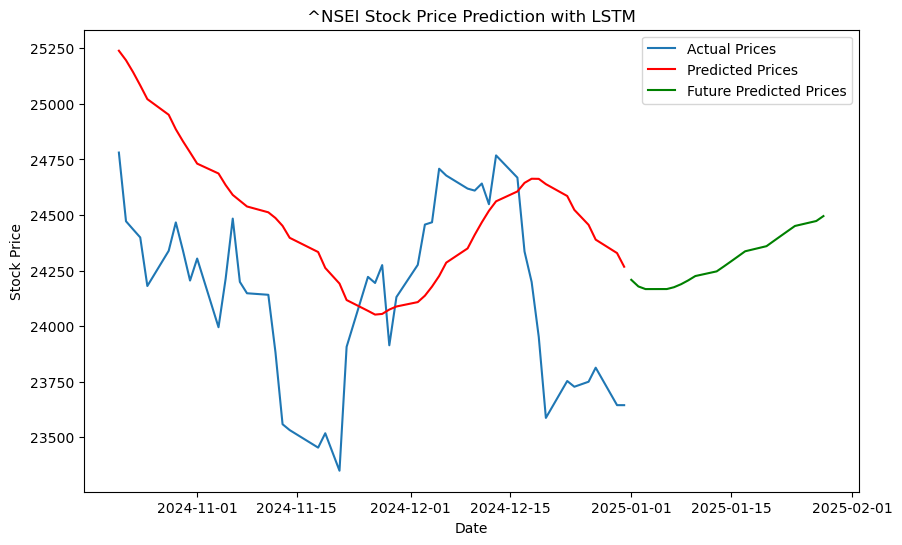

In [23]:
plt.figure(figsize=(10,6))
plt.plot(df.index[training_data_len:], y_test, label='Actual Prices')
plt.plot(df.index[training_data_len:], predictions, label='Predicted Prices', color='red')

# Create future date range for the next 30 days
future_dates = pd.date_range(start=df.index[-1], periods=future_steps + 1, freq='B')[1:]

plt.plot(future_dates, future_predictions, label='Future Predicted Prices', color='green')
plt.title(f'{ticker} Stock Price Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [25]:
forecasted_values = np.array(future_predictions)
forecasted_values

array([[24208.662],
       [24178.834],
       [24166.982],
       [24167.154],
       [24175.37 ],
       [24188.959],
       [24206.121],
       [24225.635],
       [24246.666],
       [24268.648],
       [24291.193],
       [24314.041],
       [24337.018],
       [24360.006],
       [24382.93 ],
       [24405.742],
       [24428.412],
       [24450.92 ],
       [24473.256],
       [24495.414]], dtype=float32)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

raw_actual = yf.download(ticker, start='2024-12-01', end='2024-12-31')

[*********************100%***********************]  1 of 1 completed


In [29]:
raw_actual.dropna(inplace=True)
actual_values = np.array(raw_actual['Close'])

actual_values

array([[24276.05078125],
       [24457.15039062],
       [24467.44921875],
       [24708.40039062],
       [24677.80078125],
       [24619.        ],
       [24610.05078125],
       [24641.80078125],
       [24548.69921875],
       [24768.30078125],
       [24668.25      ],
       [24336.        ],
       [24198.84960938],
       [23951.69921875],
       [23587.5       ],
       [23753.44921875],
       [23727.65039062],
       [23750.19921875],
       [23813.40039062],
       [23644.90039062]])

In [31]:
mape = np.mean(np.abs((actual_values - forecasted_values) / actual_values)) * 100

In [33]:
mae = mean_absolute_error(actual_values, forecasted_values)

In [35]:
rmse = np.sqrt(mean_squared_error(actual_values, forecasted_values))

In [37]:
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Percentage Error (MAPE): 1.87%
Mean Absolute Error (MAE): 452.34
Root Mean Squared Error (RMSE): 505.34


In [41]:
df_lstm = pd.DataFrame(forecasted_values)
df_lstm.dropna(inplace=True)
df_lstm.to_csv('LSTM_forecast.csv', index=False)